## iris 데이터 학습시키기
이전에는 `seaborn` 모듈에서 제공하는 `iris` 데이터셋을 불러와서 분석을 했었다.

이번에는 `sklearn` 모듈의 `load_iris`를 통해 데이터셋을 불러온다.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

먼저, `sklearn.datasets`의 `load_iris`를 임포트한다.

In [2]:
from sklearn.datasets import load_iris
dataset = load_iris()

불러온 학습셋과 정답셋을 각각 `DataFrame`으로 만든 후, `concat`으로 합쳐본다.

In [3]:
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
target = pd.DataFrame(dataset.target, columns=['target_'])
iris = pd.concat([data, target], axis=1)

학습 시 필요한 데이터는 숫자 데이터, 그 중에서도 정수형이기 때문에 아래와 같이 데이터의 타입을 `int` 타입으로 바꿔준다.

In [4]:
iris.target_ = iris.target_.astype('int')

데이터의 정보를 확인해본다.

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target_              150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


`corr`를 통해 상관관계를 확인해보면 아래와 같다.

In [6]:
iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target_,0.782561,-0.426658,0.949035,0.956547,1.000000


`pairplot`으로 시각화도 해본다.

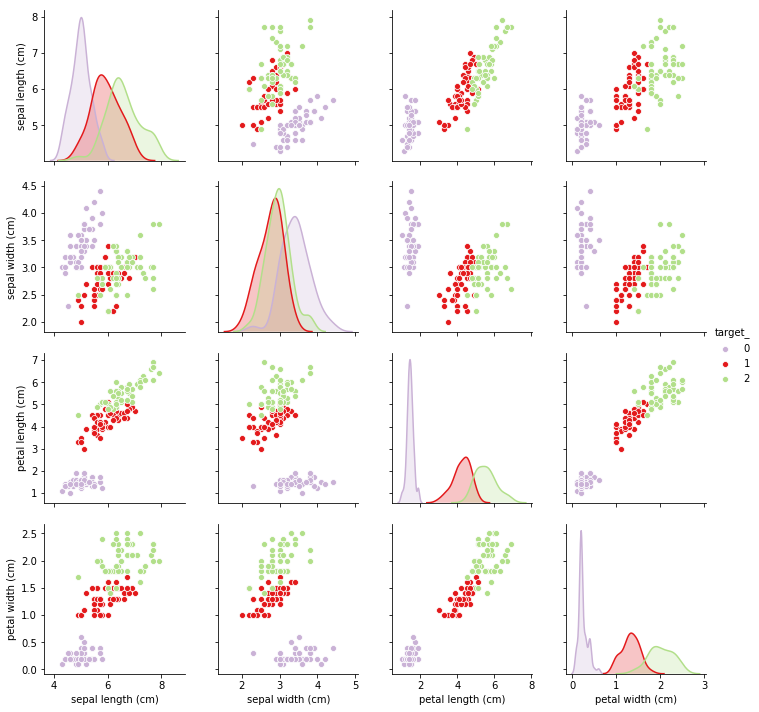

In [7]:
sns.pairplot(iris, vars=iris.columns[:-1], palette='Paired_r', hue='target_')

상관관계에 대한 `heatmap` 역시 그릴 수 있다.

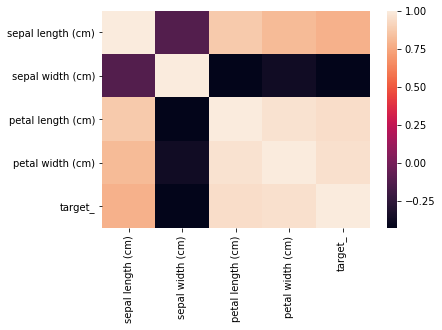

In [8]:
sns.heatmap(iris.corr())

## Scikit-Learn
그동한 데이터를 분석했던 것을 토대로 기계학습을 시도해본다. `scikit-learn`을 처음으로 맛보기를 해보고자 한다.

먼저, `neighbors` 알고리즘 중 그 유명한 `KNN` 모델을 사용해 데이터를 분류해본다. 아래와 같이 코드를 작성한다.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

`scikit-learn`은 추상화가 잘되어있는 모듈이다.

모델을 사용하는 모든 방법들은 하나의 방법으로 귀결되는데, 먼저 모듈을 인스턴스화한 후 `fit` 메소드를 통해 데이터를 학습시킨 후 `predict` 메소드로 예측을 시도한다.

In [10]:
knn.fit(iris.iloc[:, :-1], iris.iloc[:, -1])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

`fit`를 하면 학습이 완료된 모델을 반환한다.

학습이 완료된 모델에 적용된 여러 파라미터들은 `하이퍼 파라미터(Hyper-Parameter)`라고 한다.

하이퍼 파라미터에 대한 자세한 설명은 뒷장에서 다루고자 한다.

In [11]:
knn.predict([[3, 3, 3, 3]])

array([1])

위의 `predict` 메소드를 통해 나온 예측 결과는 `target`의 인덱스 번호에 해당한다.

In [12]:
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

즉, 학습시킨 모델에 `3, 3, 3, 3` 이라는 데이터를 예측시켰을 때 `versicolor`로 예측했다는 의미이다.

마찬가지로 `결정 트리(Decision Tree)` 모델을 사용하여 분류를 해본다.

사용 방법은 위와 동일하게 먼저 모델을 인스턴스화 시킨 후 `fit` 한 다음 `predict`로 예측을 시도한다.

In [13]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(iris.iloc[:, :-1], iris.iloc[:, -1])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
tree.predict([[3, 3, 3, 3]])

array([1])

## What is Scikit-Learn?
- 공식 홈페이지: https://scikit-learn.org/
- Simple and efficient tools for data mining and data analysis
- Accessible to everybody, and reusable in various contexts
- Built on NumPy, SciPy, and matplotlib
- Open source, commercially usable - BSD license

In [2]:
!pip install missingno

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mino

## tidy-data: iris 불러오기
seaborn을 통해 불러올 때 다음과 같이 불러왔다.

In [4]:
iris_seaborn = sns.load_dataset('iris')
iris_seaborn.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
11,4.8,3.4,1.6,0.2,setosa
94,5.6,2.7,4.2,1.3,versicolor
20,5.4,3.4,1.7,0.2,setosa
133,6.3,2.8,5.1,1.5,virginica
14,5.8,4.0,1.2,0.2,setosa


## sklearn을 통해 tidy-data 불러오기
`scikit-learn` 패키지가 없을 경우 아래의 명령어를 주피터 셀에 입력해준다.

```python
%pip install --upgrade sklearn
```

In [6]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

불러온 데이터셋을 `dir`로 살펴보면 아래와 같다.

In [7]:
dir(iris_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

`scikit-learn`을 통해 불러온 데이터셋에 대한 설명을 볼 때는 `DESCR`를 통해 볼 수 있다.

In [8]:
print(iris_dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

학습에 필요한 학습 데이터셋과 정답셋을 `DataFrame`으로 바꿔준다.

In [9]:
iris_data = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
iris_target = pd.DataFrame(iris_dataset.target, columns=['target'])

In [10]:
iris_data.info()
iris_data.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
47,4.6,3.2,1.4,0.2
74,6.4,2.9,4.3,1.3
46,5.1,3.8,1.6,0.2
102,7.1,3.0,5.9,2.1
125,7.2,3.2,6.0,1.8


In [11]:
iris_target.info()
iris_target.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
target    150 non-null int32
dtypes: int32(1)
memory usage: 680.0 bytes


,target
24,0
106,2
98,1
27,0
92,1


`concat`으로 데이터들을 합쳐준다.

In [12]:
iris = pd.concat([iris_data, iris_target], axis=1)

학습을 시키기 전에 `Visualization` 해본다.
- 아래의 그래프를 보면 데이터들을 classfication 할 수 있다는 것을 알 수 있다.
- classfication이 가능하다는 것은 곧 기계학습을 할 수 있다는 것을 확인할 수 있다.

In [13]:
iris['target'] = iris['target'].astype('category')

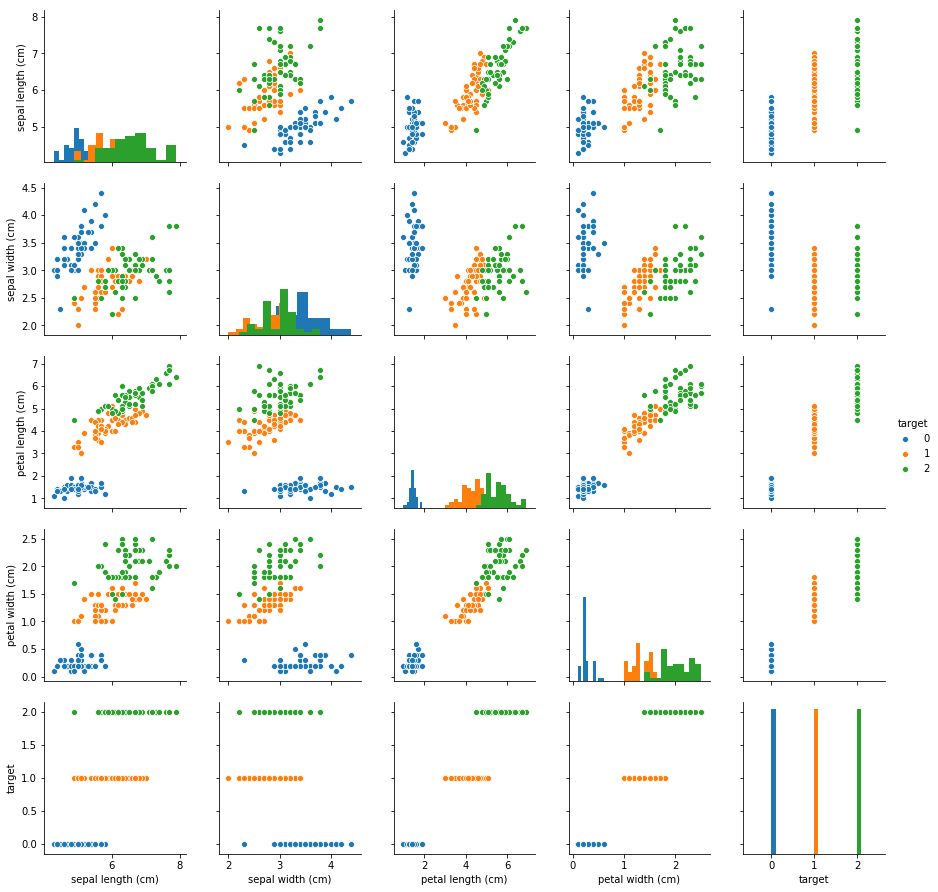

In [14]:
sns.pairplot(iris, diag_kind='hist', hue='target')

### iloc로 가져오기

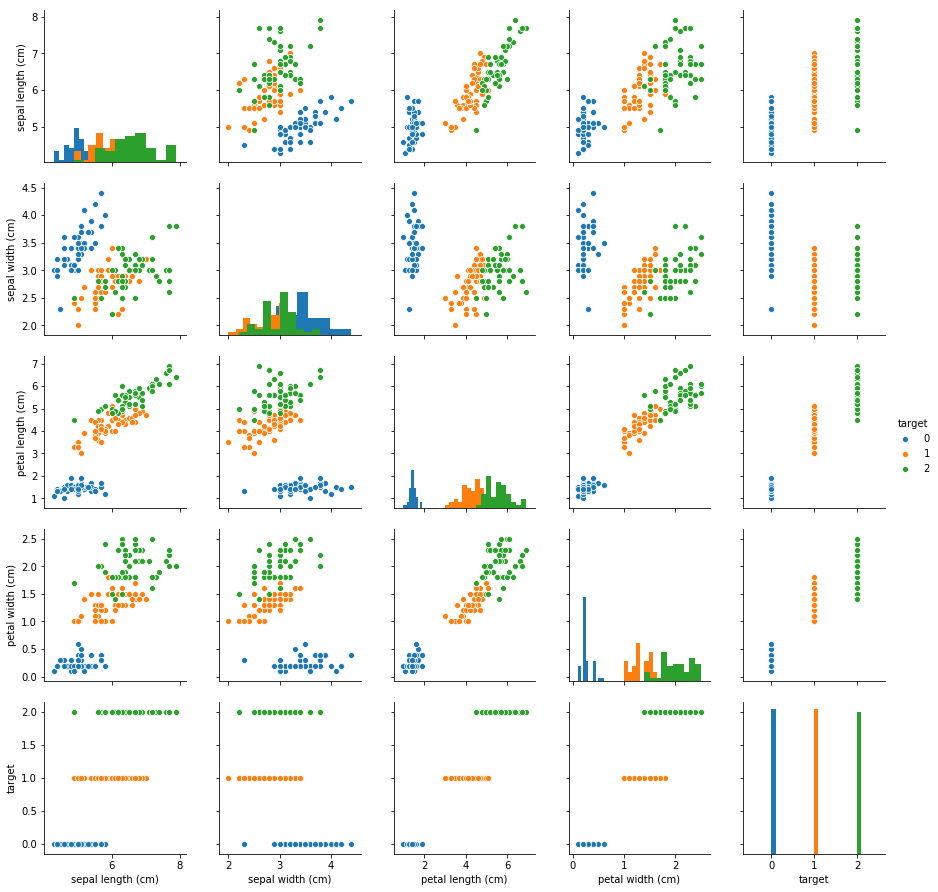

In [15]:
sns.pairplot(iris.iloc[:-1], diag_kind='hist', hue='target')

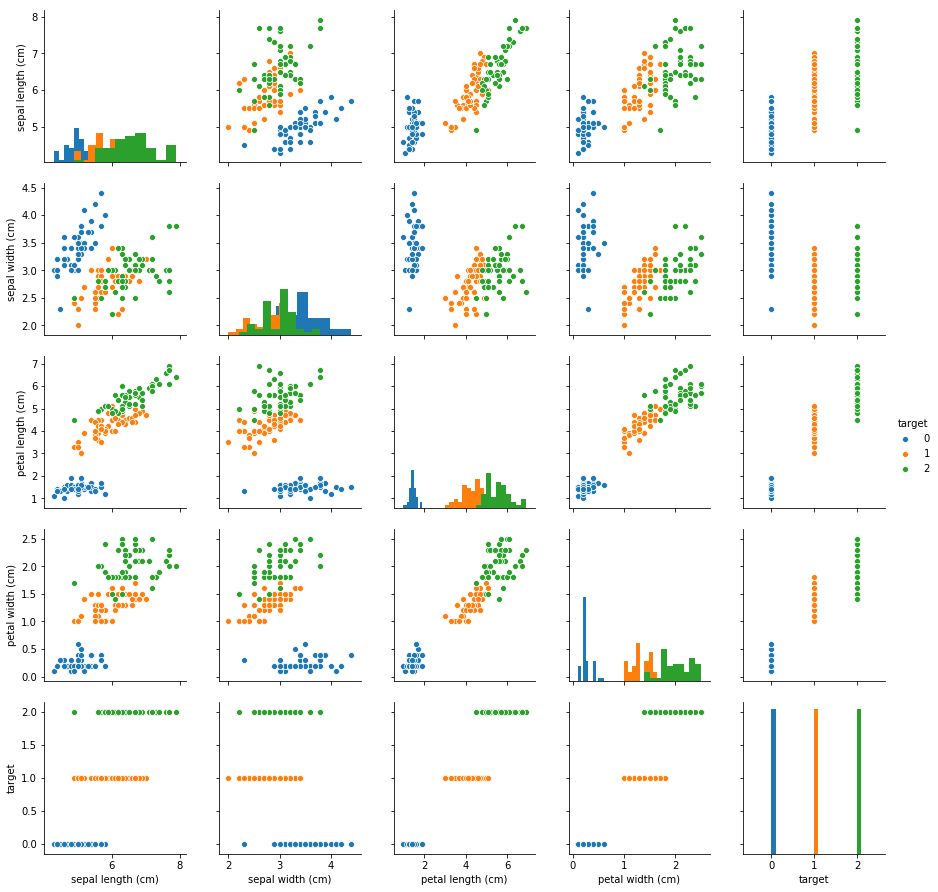

In [16]:
sns.pairplot(iris, vars=iris.iloc[:-1], diag_kind='hist', hue='target')

## tidy-data: boston 가져오기

In [17]:
from sklearn.datasets import load_boston

In [18]:
boston_dataset = load_boston()
boston_data = pd.DataFrame(boston_dataset.data,
                           columns=boston_dataset.feature_names)
boston_target = pd.DataFrame(boston_dataset.target, columns=['target'])

In [19]:
boston_data.info()
boston_data.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
473,4.64689,0.0,18.10,0.0,0.614,6.980,67.6,2.5329,24.0,666.0,20.2,374.68,11.66
184,0.08308,0.0,2.46,0.0,0.488,5.604,89.8,2.9879,3.0,193.0,17.8,391.00,13.98
178,0.06642,0.0,4.05,0.0,0.510,6.860,74.4,2.9153,5.0,296.0,16.6,391.27,6.92
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
317,0.24522,0.0,9.90,0.0,0.544,5.782,71.7,4.0317,4.0,304.0,18.4,396.90,15.94


In [20]:
boston_target.info()
boston_target.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
target    506 non-null float64
dtypes: float64(1)
memory usage: 4.0 KB


,target
148,17.8
10,15.0
131,19.6
375,15.0
398,5.0


In [21]:
boston_target['target'] = boston_target['target'].astype('category')

In [22]:
boston = pd.concat([boston_data, boston_target], axis=1)
boston.info()
boston.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
target     506 non-null category
dtypes: category(1), float64(13)
memory usage: 64.2 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
251,0.21409,22.0,5.86,0.0,0.431,6.438,8.9,7.3967,7.0,330.0,19.1,377.07,3.59,24.8
52,0.05360,21.0,5.64,0.0,0.439,6.511,21.1,6.8147,4.0,243.0,16.8,396.90,5.28,25.0
55,0.01311,90.0,1.22,0.0,0.403,7.249,21.9,8.6966,5.0,226.0,17.9,395.93,4.81,35.4
199,0.03150,95.0,1.47,0.0,0.403,6.975,15.3,7.6534,3.0,402.0,17.0,396.90,4.56,34.9
307,0.04932,33.0,2.18,0.0,0.472,6.849,70.3,3.1827,7.0,222.0,18.4,396.90,7.53,28.2


### Visualization

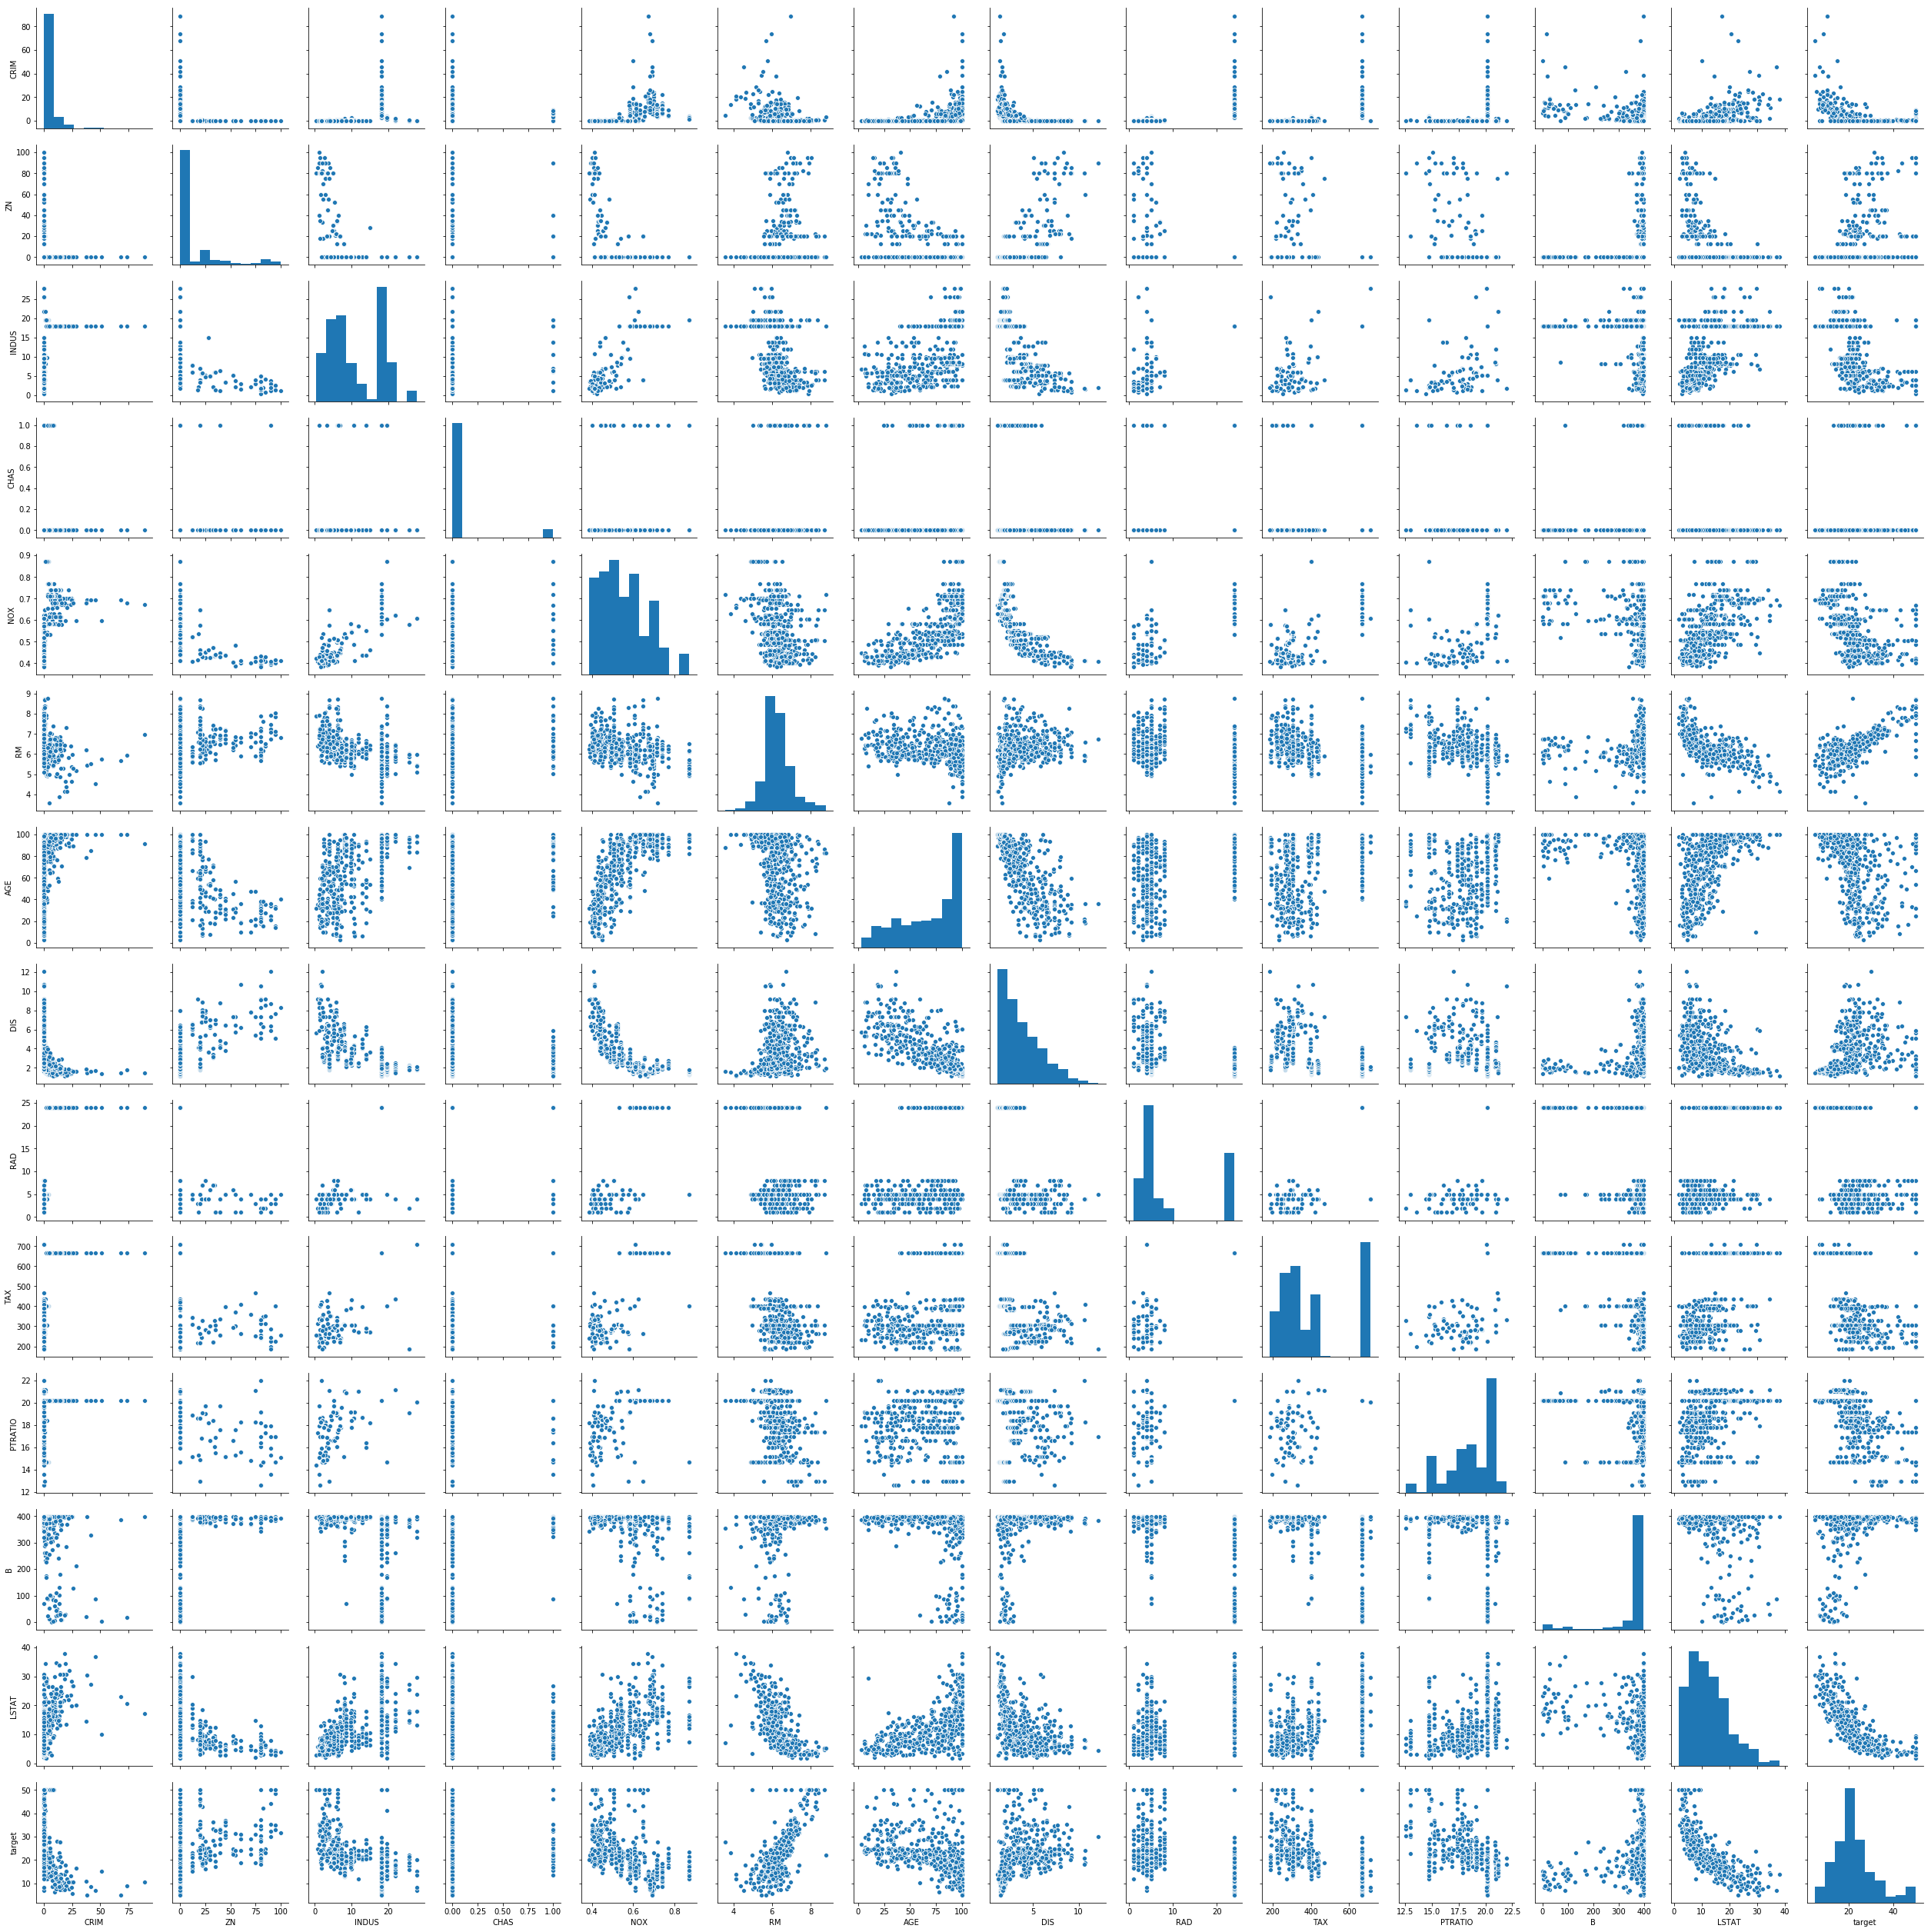

In [23]:
sns.pairplot(boston)

### 상관관계 확인

In [24]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


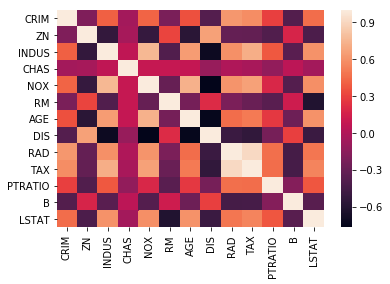

In [25]:
sns.heatmap(boston.corr())

## 학습 시키기

In [26]:
from sklearn.neighbors import KNeighborsClassifier

### Hyper Parameter
- 신경망 학습을 통해서 튜닝 또는 최적화 해야하는 주변수가 아니라 학습 진도율이나 일반화 변수처럼 사람들이 선험적 지식으로 설정을 하거나 외부 모델 메커니즘을 통해 자동으로 설정이 되는 변수를 의미한다.

`KNN` 모델에 적용되는 파라미터는 `Hyper Parameter`이다.

In [27]:
knn = KNeighborsClassifier()

`fit` 메소드를 호출할 때, `X`에는 학습 데이터셋, `y`에는 정답셋을 넣어준다.

In [28]:
knn.fit(iris.iloc[:, :-1], iris.iloc[:, -1])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

`predict`를 통해 예측을 시도한다.

In [29]:
pred = knn.predict([[3, 3, 3, 3]])

예측된 결과를 확인해본다.

In [30]:
iris_dataset.target_names[pred]

array(['versicolor'], dtype='<U10')

## boston 데이터로 학습

In [31]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(boston.iloc[:, :-1], boston.iloc[:, -1])
knn.predict([boston.iloc[2, :-1]])

array([25.36])

In [32]:
boston.iloc[2, -1]

34.7

`missing value`가 섞여있는 데이터를 어떻게 처리하고 학습을 시키는지에 대해 알아보고자 한다. 실습에 사용할 데이터는 `seaborn`에서 제공하는 `mpg` 데이터셋을 사용하고자 한다.

In [1]:
import pandas as pd
import seaborn as sns

여기서 학습에 필요한 데이터만 따로 빼놓는다.

In [2]:
mpg = sns.load_dataset('mpg')
mpg = mpg.iloc[:, :-1]

`info`를 통해 확인해보면 `horsepower` 컬럼에 `missing value`가 있는 것을 확인할 수 있다.

In [3]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null object
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


`missingno` 모듈을 통해 `missing value`를 시각화하여 살펴볼 수 있다.

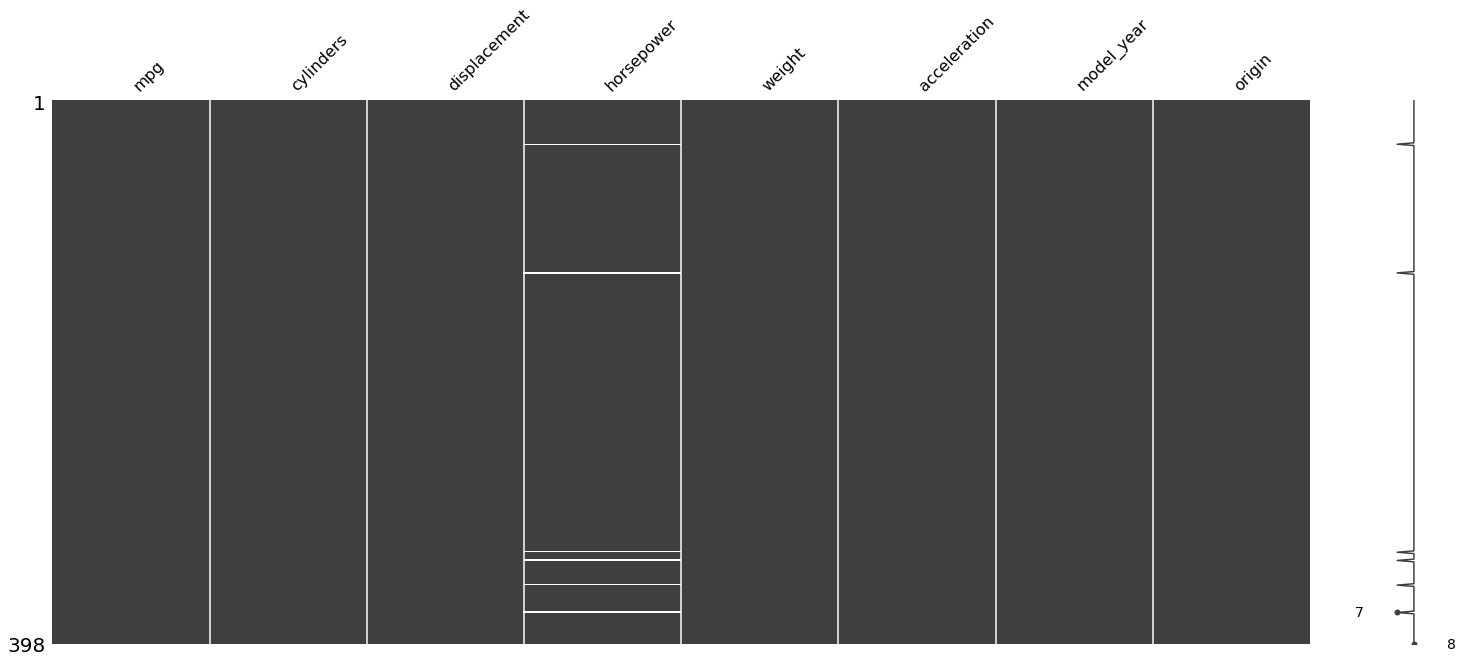

In [4]:
import missingno as mino
mino.matrix(mpg)

위에서 살펴본 바와 같이 `missing value`가 있다는 것을 확인했다. 첫번재 방법은 가장 단순하게 `dropna`를 통해 `missing value`가 있는 row 데이터를 날린다.

In [5]:
mpg.dropna(inplace=True)

In [6]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
model_year      392 non-null int64
origin          392 non-null object
dtypes: float64(4), int64(3), object(1)
memory usage: 27.6+ KB


학습에 적합한 데이터인지 그래프를 그려 시각화해본다.

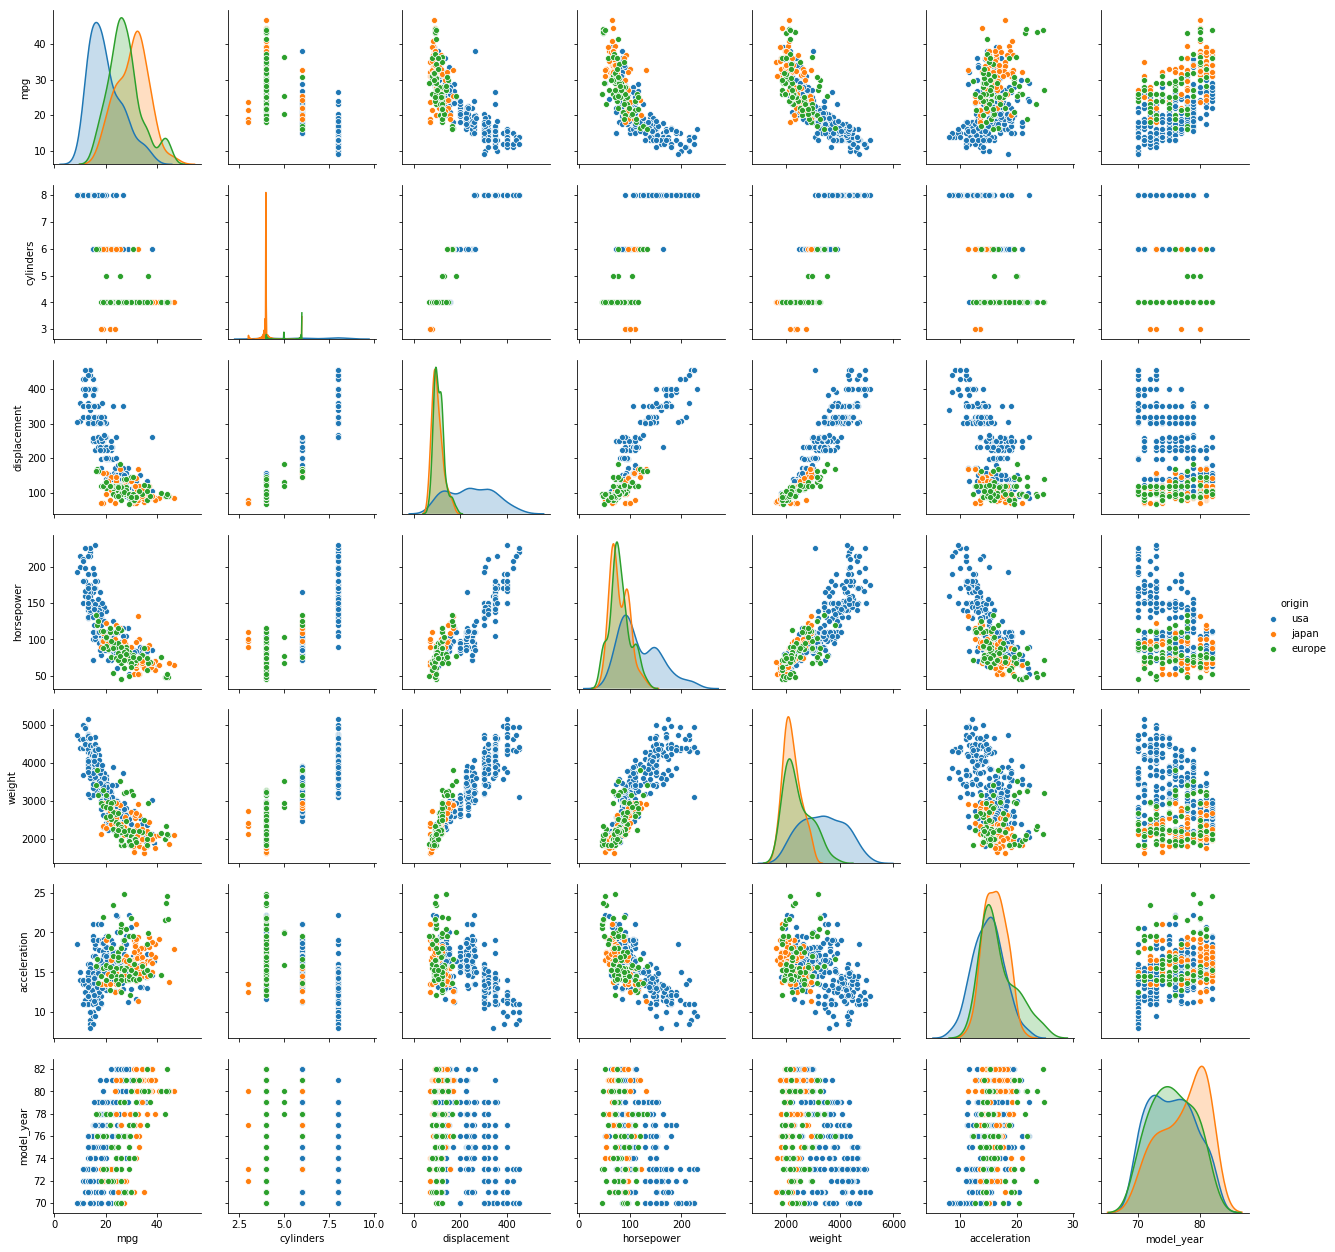

In [7]:
sns.pairplot(mpg, hue='origin')

데이터가 적은 경우, 섣불리 `dropna`를 하게되면 성능이 낮아질 수밖에 없다. 따라서 두번째 방법으로, `fillna`를 사용하여 주변 데이터의 평균 데이터를 `missing value`에 채워넣는 방식이 있다.

In [9]:
mpg = sns.load_dataset('mpg')
mpg = mpg.iloc[:, :-1]
mpg.horsepower = mpg.horsepower.fillna(method='ffill')

`missing value`를 기준으로 앞의 데이터들에 대한 평균값으로 채워넣었다.

In [10]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null object
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


`origin` 컬럼을 target 데이터로써 분류하고자 한다. 그러나 dtype이 `object`라는 것을 확인할 수 있다.

In [11]:
mpg.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

기계학습은 숫자 데이터로만 해야하기 때문에 이를 숫자 데이터로 바꾸어준다.

In [12]:
mpg.origin = mpg.origin.map({'usa':0, 'japan':1, 'europe':2})

In [13]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


이제 학습을 시도해본다. 먼저, <b>과적합(Overfitting)</b> 현상을 방지하기 위해 `train_test_split`을 통해 학습에 필요한 데이터와 테스트를 위한 데이터로 분리시켜 학습이 잘 되었는지 `검증(validation)`하고자 한다.

<b>과적합</b>이란, 주어진 학습 데이터셋에 너무 치중되어 학습된 나머지, 주어진 데이터가 주어졌을 경우에는 굉장한 성능을 보이는 반면, 학습할 때 주어지지 않은 데이터가 주어졌을 경우에는 성능이 잘 나오지 않게되는 현상을 의미한다.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =\
    train_test_split(mpg.iloc[:, :-1], mpg.iloc[:, -1])

성능 평가를 위해 train 데이터셋과 test 데이터셋으로 분리시켰다.

이제 knn 모델을 이용하여 학습을 시도해본다.

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

test 데이터가 주어졌을 때, 예측 결과는 다음과 같이 나타났다.

In [16]:
knn.predict(X_test)

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 2, 1, 1, 2, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

실제 모델의 성능이 어느정도인지 확인해본다.

In [17]:
knn.score(X_test, y_test)

0.69